<a href="https://colab.research.google.com/github/riya3215/Python/blob/main/customer_segmentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**
Import the necessary libraries for data manipulation and cleaning, such as pandas, NumPy, and matplotlib/seaborn for visualization.

In [67]:
import pandas as pd

import numpy as np

import matplotlib as matlab
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **ABOUT ECOMMERCE DATASET**

This dataset contains historical data of e-commerce sales spanning from 2011 to 2014. It provides insights into the sales transactions, customer behavior, and product trends within an online retail environment.

coulmns:-
* Order_ID: Unique identifier for each order. Data Type: Text.
* Product_ID: Unique identifier for each product. Data Type: Text.
* Product_Name: Name of the product. Data Type: Text.
* Category: Category of the product. Data Type: Text.
* Price: Price of the product. Data Type: Numeric. Unit: USD.
* Quantity: Quantity of the product ordered. Data Type: Numeric. Unit: Pieces.
* Order_Date: Date the order was placed. Data Type: Date.
* Customer_ID: Unique identifier for each customer. Data Type: Text.
* Customer_Name: Name of the customer. Data Type: Text.

And so on.

**Source**:- Kaggle


# **LOAD RAW DATA**
Load raw data into a pandas. We can use functions like pd.read_excel() for Excel files.

In [5]:
df = pd.read_excel('/root/ecomm_data.xlsx')
df.head()

Row ID        Order ID  Year Order Date  Ship Date  shipment days  \
0       1  CA-2013-152156  2013 2013-11-09 2013-11-12              3   
1       2  CA-2013-152156  2013 2013-11-09 2013-11-12              3   
2       3  CA-2013-138688  2013 2013-06-13 2013-06-17              4   
3       4  US-2012-108966  2012 2012-10-11 2012-10-18              7   
4       5  US-2012-108966  2012 2012-10-11 2012-10-18              7   

        Ship Mode Customer ID    Customer Name    Segment  ... Postal Code  \
0    Second Class    CG-12520      Claire Gute   Consumer  ...       42420   
1    Second Class    CG-12520      Claire Gute   Consumer  ...       42420   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  ...       90036   
3  Standard Class    SO-20335   Sean O'Donnell   Consumer  ...       33311   
4  Standard Class    SO-20335   Sean O'Donnell   Consumer  ...       33311   

  Region       Product ID         Category Sub-Category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  
0     0.00   41.9136  
1     0.00  219.5820  
2     0.00    6.8714  
3     0.45 -383.0310  
4     0.20    2.5164  

[5 rows x 23 columns]

# **Explore the Data**
Begin by exploring data to get an understanding of its structure. Use functions like info(), and describe() to inspect the dataset's contents.

In [9]:
df = pd.read_excel('/root/ecomm_data.xlsx')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Year           9994 non-null   int64         
 3   Order Date     9994 non-null   datetime64[ns]
 4   Ship Date      9994 non-null   datetime64[ns]
 5   shipment days  9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

# **HANDLING MISSING VALUES:**
Identify and handle missing values. Common methods include:

* Dropping rows or columns with too many missing values.


In [16]:
# Drop rows with missing values
df.dropna(inplace=True)


# **(1):-**
 **The historical trend of total sales and profit for each year (6 month)**

In [34]:

df_new= pd.read_excel('/root/ecomm_data.xlsx')
df_new = df_new.groupby('Year')[['Sales', 'Profit']].sum().reset_index()
print(df_new)

fig = px.line(df_new, x='Year', y=['Sales', 'Profit'], title='Sales and Profit Over the Years',
              labels={'Year': 'Year', 'value': 'Amount'}, markers=True, line_dash_sequence=['solid', 'dash'])

fig.update_traces(name='Sales', selector=dict(name='Sales'))
fig.update_traces(name='Profit', selector=dict(name='Profit'))

fig.show()


   Year        Sales      Profit
0  2011  484247.4981  49543.9741
1  2012  470532.5090  61618.6037
2  2013  608473.8300  81726.9308
3  2014  733947.0232  93507.5131


We can see from above chart the sales was slightly go down upto 2012 and then it increased.On the other hand,we can see profit was slightly increase year to year on the sales of product.

# **(2) :-**
**The shipment time impact the sales and customer satisfaction for different ship modes and suggested optimization strategies to improve the shipment time while maintaining the cost-effectiveness.**

         Ship Mode         Category  shipment days       Sales
0      First Class        Furniture       2.143731  338.625452
1      First Class  Office Supplies       2.202198  111.354186
2      First Class       Technology       2.162791  463.008608
3         Same Day        Furniture       0.025210  328.981336
4         Same Day  Office Supplies       0.049080   89.234604
5         Same Day       Technology       0.051020  613.508827
6     Second Class        Furniture       3.264637  366.016451
7     Second Class  Office Supplies       3.217014  139.481773
8     Second Class       Technology       3.284153  388.583448
9   Standard Class        Furniture       4.979167  349.223933
10  Standard Class  Office Supplies       5.024189  117.630907
11  Standard Class       Technology       4.982440  456.971382


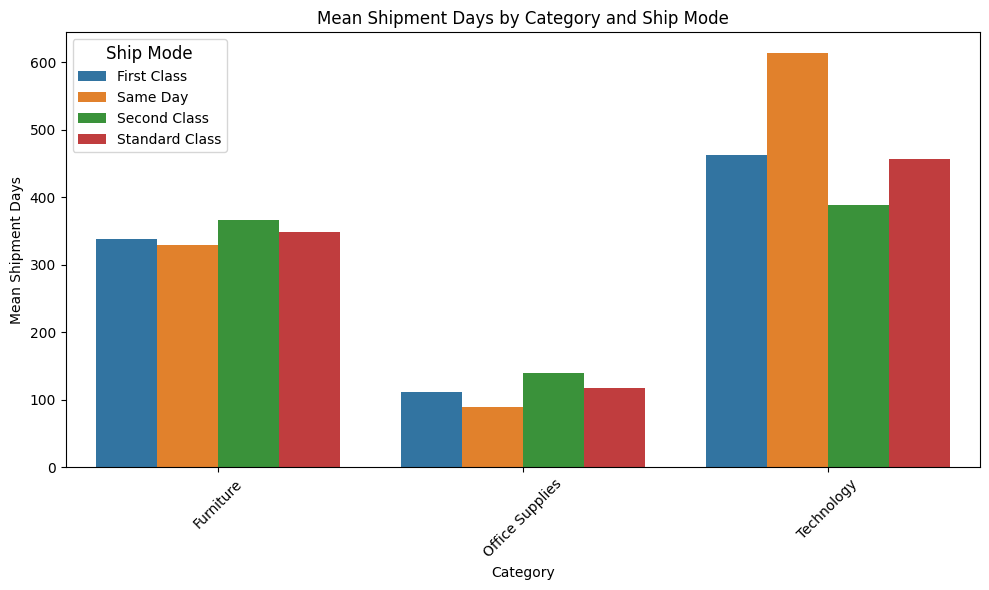

In [77]:


df = pd.read_excel('/root/ecomm_data.xlsx')
df_agg = df.groupby(["Ship Mode", "Category"])[["shipment days","Sales"]].mean().reset_index()
print(df_agg)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_agg, x="Category", y="Sales", hue="Ship Mode")

plt.xlabel("Category")
plt.ylabel("Mean Shipment Days")
plt.title("Mean Shipment Days by Category and Ship Mode")

plt.legend(title="Ship Mode", title_fontsize="12")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* Customers prefer faster delivery in Technology categories. Lets see the First
Class shippment mode total sales is higher then than Furniture and Office Supplies category. So company should focus on same days and first class ship mode in Technology category for better coustomer experience bacause in standard class average shipment time is 5 days and technology category has overall high sales so for company this is important step for growth in technology market.

* The Furniture and Office Supplies sub-categories have the maximum sales in the Second Class. This suggests that customers are willing to wait 3 days  for their deliveries as long as they receive their items in good condition and at a reasonable price. So company should focus on second class ship mode in Office Supplies and Furniture category.

* To ensure that these items reach the customers in good condition, the company could invest in better packaging and handling methods. This can help to maintain customer satisfaction and increase repeat business.

# **(3):-**
**Analyze the impact of the average sales and profit for each consumer, corporate and office segment with each category.**

                                          Sales      Profit
Region  Segment     Category                               
Central Consumer    Furniture        338.153800  -15.664448
                    Office Supplies  125.996589    3.495458
                    Technology       333.443743   45.758436
        Corporate   Furniture        380.186874   16.948861
                    Office Supplies   98.651561    0.238117
                    Technology       544.306807  136.828683
        Home Office Furniture        286.318461  -13.467518
                    Office Supplies  123.222688   23.299030
                    Technology       397.024892   89.632284
East    Consumer    Furniture        376.936640    6.726443
                    Office Supplies  114.026054   21.647176
                    Technology       487.198665   71.691293
        Corporate   Furniture        324.288111    1.727908
                    Office Supplies  127.836029   25.880125
                    Technology       438

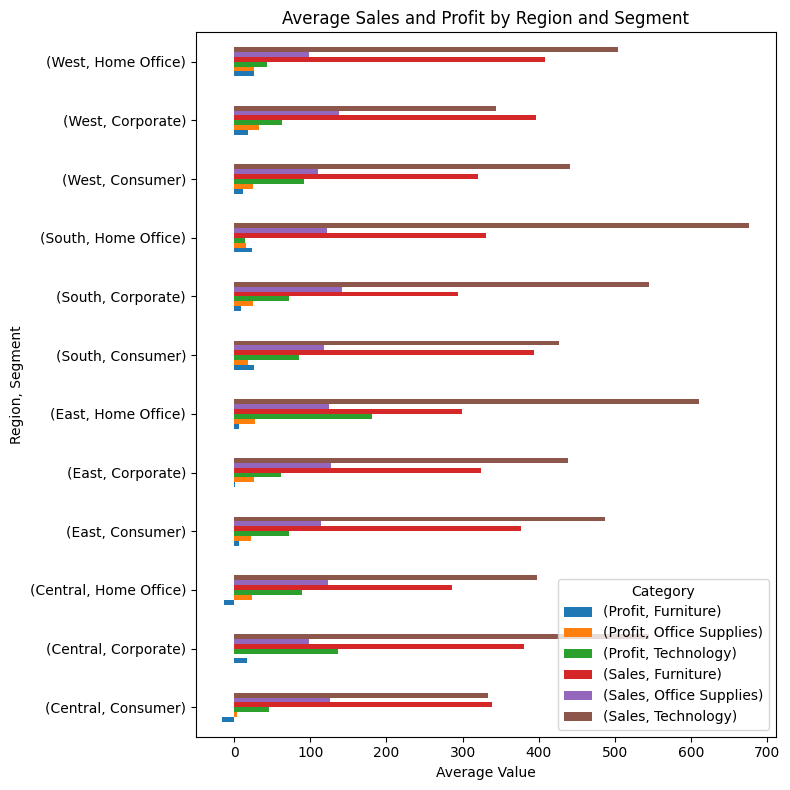

In [45]:
import matplotlib.pyplot as plt
df = pd.read_excel('/root/ecomm_data.xlsx')
df_agg1 = df.groupby(["Region","Segment","Category"])[["Sales","Profit"]].mean()

print(df_agg1)
# Pivot the DataFrame to make it suitable for plotting
pivot_df = df_agg1.pivot_table(index=["Region", "Segment"], columns="Category", values=["Sales", "Profit"])

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 8))
pivot_df.plot(kind='barh', ax=ax, legend=True)

# Customize plot labels and title
ax.set_xlabel('Average Value')
ax.set_ylabel('Region, Segment')
ax.set_title('Average Sales and Profit by Region and Segment')

plt.legend(title='Category')
plt.tight_layout()

plt.show()

This graph shows  that segment-wise division of customers of different region  on the basis of sales and profit of the  product which is helpful for the improvement of marketing and sales of the product. The detailed description of the graph is given below-






* The Technology category is a standout performer, with the highest average   sales and average profit across  across all three segments and all regions. This highlights the potential for continued growth and success in this area and suggests a strong focus on this category in terms of investment and marketing efforts is warranted.

* The Furniture category exhibits lower average sales and average profit across all three segments, particularly in the Central & East region where the average profit for Furniture is negative. It is imperative that the company evaluates the performance of the Furniture category in this region and implements appropriate measures to address the situation.

* The Office Supplies category exhibits moderate performance with regards to average sales and average profit across all three segments. However, it is important to note that the Central region shows a potential for improvement as the sales are generated but the average profit is low.

**Note :** It can be inferred that the Technology sub-category is the most profitable segment for the company and should be given priority in terms of investment and marketing efforts. The Furniture sub-category should be reviewed to identify opportunities for improvement and the Office Supplies sub-category can be seen as a moderate performer.

# **(4):-**
**The company consider offer discounts on categories wise.**

Axes(0.125,0.11;0.775x0.77)


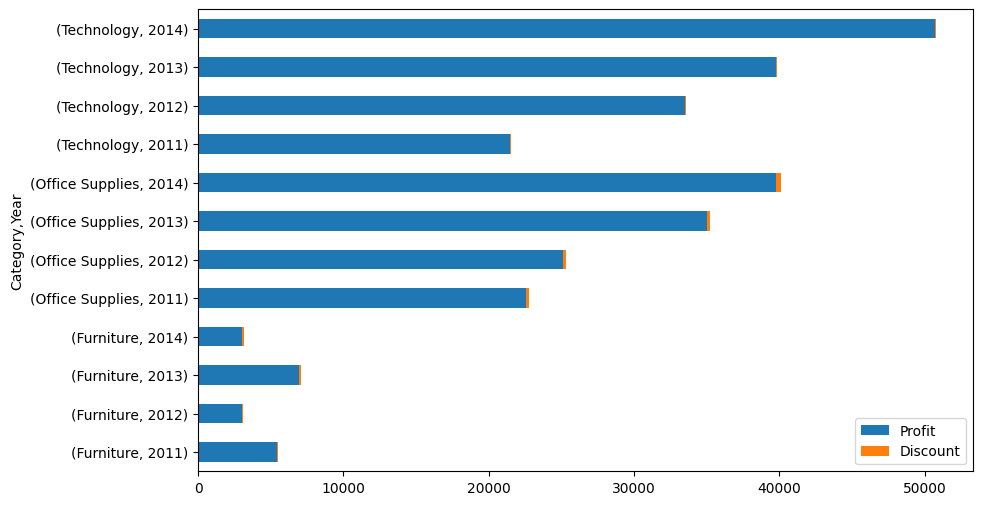

In [53]:
df = pd.read_excel('/root/ecomm_data.xlsx')
df_agg2 = df.groupby(["Category","Year"])[["Profit","Discount"]].agg("sum").plot(kind='barh',stacked=True,figsize=(10,6))
print(df_agg2)

* The company should prioritize investments and marketing efforts in the Technology category. The Technology category has consistently seen highest growth in terms of profit over the years.

* The Office Supplies category, although having a moderate average profit over the years, should be monitored as the graph shows a slight decrease.

* The Furniture category, on the other hand, has consistently low profit and may require a review to identify opportunities for improvement.

It is required to give discount on purchase of the Furniture and office supplies for marketing and profit of the company's sales.



# **(5):-**

**Region has recorded a high volume of customer purchased orders in  years.**

              Quantity
Region  Year          
Central 2011      1726
        2012      1815
        2013      2359
        2014      2880
East    2011      1986
        2012      2382
        2013      2835
        2014      3415
South   2011      1336
        2012      1344
        2013      1606
        2014      1923
West    2011      2533
        2012      2438
        2013      3010
        2014      4285


<Axes: title={'center': 'Region wise order'}, xlabel='Region'>

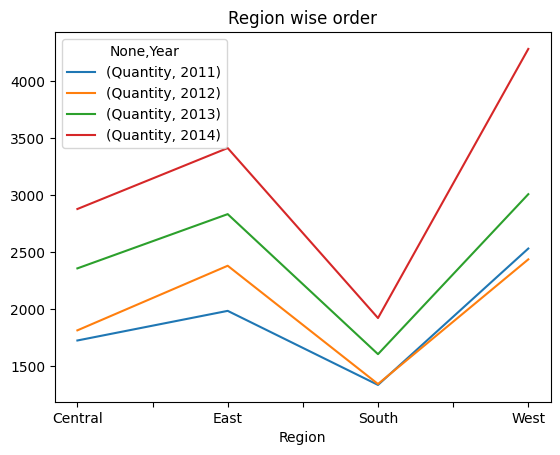

In [55]:
df_new= pd.read_excel('/root/ecomm_data.xlsx')
df1 = df.groupby(["Region","Year"])[["Quantity"]].agg("sum")
print(df1)
df1.unstack().plot(title="Region wise order")


It is observed that the West region of customers purchased has the highest quantity of orders in all years, followed by the East and Central regions of Customers, while the South region of customers purchased has the lowest quantity of orders. This indicates that the West and east region could be a potential target for increased marketing and sales order, while the South region may require further analysis to understand why it is not performing as well and what can be done to improve sales in that region.

# **REPORTING ANALYTICS**
This is automatic generated report that gives us summary about different features present in our dataset. Management can get an overview about different KPIs like correlation,null values,data types,interaction,etc.

In [66]:
from pandas_profiling import ProfileReport
import datetime as dt
df = pd.read_excel('/root/ecomm_data.xlsx')
report = ProfileReport(df)
report

<ipython-input-66-836ed9e47cfd>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In e-commerce customer segmentation analysis, The goal is to segment customers into distinct groups based on their behavior and characteristics, allowing for more targeted marketing efforts. Here's a possible conclusion that might draw from this analysis:

# **Conclusion:**

The customer segmentation analysis in our e-commerce business has provided valuable insights into our customer base. By dividing customers into different segments, we can tailor our marketing strategies and product offerings to better meet their needs. Here are the key takeaways from our analysis:

### **Segmentation into Distinct Groups:**
 Our analysis has successfully divided our customers into distinct segments based on various factors such as demographics, purchase history, and engagement patterns. These segments include:


**Engaged and active Customers:**
* Customer is intrestingly more active in purchase of Technology Category product with highest sales in all type of Ship mode.
* Customer who are in consumer segment purchased more than then the home office customer.This are loyal customer who spents most actively.
* Customers who belonging to south region on an average contributed more to sales then over other region. However, the quantity of purchasing the product in south region is comparatively lower than the other 3 region (i.e, Central, East, West).



**Occasional Shoppers:**
* Customers shows moderate intrest in  purchases of furniture. More purchase of furniture category in the 2nd class and standard class ship mode. This shows that customers are willing to purchase the furniture in good condition irrespective of their ship mode.
* Customers who are in home office and corporate segment purchase more than the consumer customer in west region. From south region,  Consumer segment made  more purchase in Furniture.
* Overall purchase on the basis of region wise contribution is coming from west region. South region is also contributed more purchase of furniture but comparatevily lower than the west. This shows  that customer from west have mmore intrest in furniture than office supplies.

**lapsed customers:**
* These are the customers who take less and not intresting in the purchase of Office supplies product.
*  Sales of Office supplies is more in 2nd class ship mode.
* Customers who belong to home office and consumer segment contributing less intrest in purchasing of office supplies than corporate segment's customers. Customers from west region is showing less intrest in offices supplies. After that central region's customers have also show less intrest in purchasing of office supplies.  

### **Marketing Strategies:**
With a clear understanding of these segments, we can now design and implement marketing strategies for each group. For example:


**engaged and active Customers:**
This customers are that customers should be required loyalty program, discount,early access to new product and gamified points system.

**Occasional Shoppers:**This customers are that customers who are active for sometime but might have shift to competitors due to change in taste ,preference etc.company should identify best customers and add a discount on special offer.

**lapsed customers:**This customers are the customer which company lost due to lack of information poor marketing stratgy ,market forces. etc. Company should try to offer them some renewal coupons, offers, bonus, newsletter publication.


## **Customer Retention and Loyalty:**
By understanding the preferences and behaviors of each segment, we can work on improving customer retention and loyalty. Loyalty programs, excellent customer service, and post-purchase support can all contribute to retaining customers.

### **Data-Driven Decision-Making:**
 This analysis highlights the importance of data-driven decision-making in our e-commerce business. Regularly reviewing and updating customer segmentation models will allow us to adapt to changing customer behaviors and market trends.




In conclusion, e-commerce customer segmentation analysis empowers us to provide a more personalized and targeted shopping experience to our customers. It helps optimize marketing efforts, enhance customer satisfaction, and ultimately drive revenue growth in our e-commerce business.